In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score

root1 = 'Covid19-dataset'
root2 = ['/test','/train']
root3 = ['/Covid','/Normal','/Viral Pneumonia']

In [29]:
### Rename

'''
remove = '.DS_Store'
path = root1+root2[1]+root3[2]

for i in range(len(root2)):
    for j in range(len(root3)):
        path = root1+root2[i]+root3[j]
        photos = os.listdir(path)
        if remove in photos:
            photos.remove(remove)

        for m in range(len(photos)):
            os.rename(path+'/%s'%(photos[m]),path+'/%d.jpg'%(m+1))
        print(path)
'''



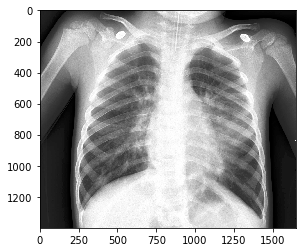

In [40]:
### Visualization
img_path = root1+root2[1]+root3[2]+'/1.jpg'

def read_img_gray(path):
    gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    gray_reverse = 255 - gray
    return gray_reverse

img = read_img_gray(img_path)
plt.imshow(img, cmap='Greys', interpolation='nearest')
plt.show()



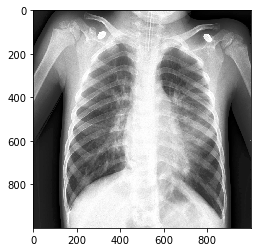

In [37]:
img_resize = cv2.resize(img,(1000,1000), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_resize, cmap='Greys', interpolation='nearest')
plt.show()

In [77]:
### generate trainning set:

root1 = 'Covid19-dataset'
root2 = ['/test','/train']
root3 = ['/Covid','/Normal','/Viral Pneumonia']
remove = '.DS_Store'


X_train = []
y_train = []

X_test = []
y_test = []

for i in range(len(root3)):
    path = root1 + root2[1] + root3[i]

    photos = os.listdir(path)
    if remove in photos:
        photos.remove(remove)

    for m in range(len(photos)):
        img = read_img_gray(path)
        img_resize = cv2.resize(img,(1000,1000), interpolation=cv2.INTER_LINEAR)
        img_ = img_resize.reshape(1,1000*1000)
        X_train.append(img_[0])
        y_train.append(i)
    
for i in range(len(root3)):
    path = root1 + root2[0] + root3[i]

    photos = os.listdir(path)
    if remove in photos:
        photos.remove(remove)

    for m in range(len(photos)):
        img = read_img_gray(path)
        img_resize = cv2.resize(img,(1000,1000), interpolation=cv2.INTER_LINEAR)
        img_ = img_resize.reshape(1,1000*1000)
        X_test.append(img_[0])
        y_test.append(i)


In [ ]:
### PCA

In [90]:
### Random Forest:
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

clf2 = RandomForestClassifier(n_estimators=10,max_features=1000, max_depth=None,min_samples_split=2, bootstrap=True)
clf2.fit(X_train[:5], y_train[:5])


RandomForestClassifier(max_features=1000, n_estimators=10)

In [ ]:
### SVM Classifier
from sklearn.svm import SVC
svm_model = SVC(kernel = 'poly')
svm_model.fit(X_train[:5], y_train[:5])
#y_pred = clf2.predict(X_train)
#accuracy_score(y_pred, y_train)

In [ ]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(
    penalty="l2", C=1.0, random_state=None, solver="lbfgs", max_iter=3000,
    multi_class='ovr', verbose=0,
)
clf.fit(X_train, y_train)
#y_pred = clf2.predict(X_train)
#accuracy_score(y_pred, y_train)

In [84]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score

y_pred = clf2.predict(X_train)
accuracy_score(y_pred, y_train)


0.44223107569721115

In [ ]:
### Data Argument

def flip(img):
    pass 


def crop(img):
    pass


### Data Normalization:

def normal(img):
    pass